In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tesser import network

# data path (edit for local setup)
data_dir = '/Users/morton/data/tesser'

# load node information
node_info = network.node_info()
print(node_info)

    comm  nodetype  connect
1      1         0        0
2      1         0        0
3      1         1        2
4      2         1        1
5      2         0        0
6      2         0        0
7      2         0        0
8      2         0        0
9      2         0        0
10     2         1        3
11     3         1        2
12     3         0        0
13     3         0        0
14     3         0        0
15     3         0        0
16     3         0        0
17     3         1        1
18     1         1        3
19     1         0        0
20     1         0        0
21     1         0        0


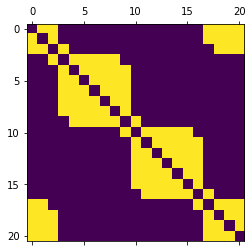

In [2]:
# get transition probability and plot it
T = network.adjacency(node_info) / 6
fig, ax = plt.subplots()
ax.matshow(T)

In [3]:
# load all structure learning runs in a dataframe
from tesser import util
df = util.load_struct(data_dir, 101)
print(df.head())

   SubjNum  run  trial  objnum           file orientnam  orientnum resp  \
0      101    1      1       9  object_17.jpg       cor        1.0  NaN   
1      101    1      2       4  object_18.jpg       cor        1.0    c   
2      101    1      3       3   object_4.jpg       cor        1.0    c   
3      101    1      4       4  object_18.jpg       rot        0.0    n   
4      101    1      5       8   object_9.jpg       cor        1.0    n   

   respnum  acc        rt  part  seqtype  
0      0.0  0.0       NaN     1      NaN  
1      1.0  1.0  1.479518     1      NaN  
2      1.0  1.0  1.334561     1      NaN  
3      2.0  1.0  1.065799     1      NaN  
4      2.0  0.0  1.234106     1      NaN  


In [4]:
# example of getting a specific run
run = 3
part = 2
df_run = df.loc[(df.part == part) & (df.run == run), :]
print(df_run.head())

   SubjNum  run  trial  objnum           file orientnam  orientnum resp  \
2      101    3      3      21  object_24.jpg       cor        1.0    c   
3      101    3      4      18  object_23.jpg       cor        1.0    c   
4      101    3      5       2  object_28.jpg       cor        1.0    c   
5      101    3      6      18  object_23.jpg       rot        0.0    n   
6      101    3      7      19   object_7.jpg       cor        1.0    c   

   respnum  acc        rt  part  seqtype  
2      1.0  1.0  0.694019     2      1.0  
3      1.0  1.0  0.590571     2      1.0  
4      1.0  1.0  0.659165     2      1.0  
5      2.0  1.0  0.696351     2      1.0  
6      1.0  1.0  0.595409     2      1.0  


In [5]:
# train SR agent on all runs
from tesser import learn
n_state = len(np.unique(df_run.objnum))
M = np.zeros((n_state, n_state))

M_all = {}
for part in (1, 2):
    runs = np.unique(df.loc[df.part == part, 'run'])
    for run in runs:
        # get data for this run
        df_run = df.loc[(df.part == part) & (df.run == run), :]
        M_new = learn.run_experiment(df_run.objnum.values, .5, .1, M)        
        M = M_new.copy()
        M_all[(part, run)] = M_new.copy()

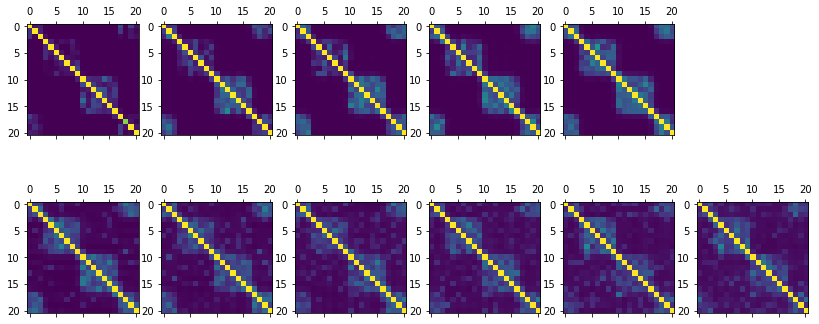

In [6]:
# plot SR after each run
fig, ax = plt.subplots(2, 6, figsize=(14, 6))
for i, part in enumerate((1, 2)):
    for j, run in enumerate(range(1, 7)):
        if (part, run) not in M_all:
            fig.delaxes(ax[i, j])
            continue
        ax[i,j].matshow(M_all[(part, run)], vmin=0, vmax=.5)